In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

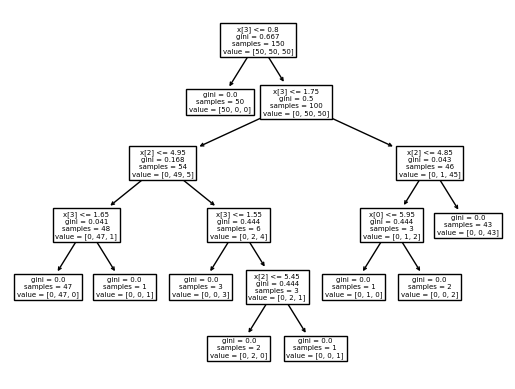

In [2]:
tree.plot_tree(clf)

The notation `Text(0.5, 0.9166666666666666` represents the positioning of text within a graphical representation, such as a plot or a chart. 

In this case, `0.5` represents the x-coordinate, and `0.9166666666666666` represents the y-coordinate of where the text is placed. These coordinates are typically normalized to the range [0, 1], where (0, 0) represents the bottom-left corner of the plot, and (1, 1) represents the top-right corner.

So, `Text(0.5, 0.9166666666666666)` would position the text horizontally at the middle (50% across) and vertically close to the top (about 91.67% up) of the plot.

(0.5, 0.9166666666666666) represents the position of the decision point in the graphical representation of the tree.
'x[3] <= 0.8' indicates the condition being evaluated. This condition is based on the value of feature x[3] being less than or equal to 0.8.
gini = 0.667 is the Gini impurity score at this node. Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
samples = 150 indicates the number of samples that reach this node.
value = [50, 50, 50] shows the distribution of samples in each class. In this case, there are 50 samples each for three classes

To determine which feature the tree split on at each node, you need to look at the conditions specified in each line of the textual representation. In the line `x[3] <= 0.8`, for example, the tree is splitting based on the value of feature `x[3]` being less than or equal to 0.8.

Here's how you can interpret it:

- `x[3]` refers to the fourth feature in your dataset. Note that Python indexing typically starts from 0, so `x[3]` actually refers to the fourth feature, not the third.
- `<= 0.8` specifies the condition for the split. In this case, it's saying that if the value of the fourth feature is less than or equal to 0.8, the decision tree will follow one branch, and if it's greater than 0.8, it will follow another branch.

So, in each line of the textual representation, look for the condition after the `<=`, `>`, `<`, etc. symbols. This condition will tell you which feature the tree is splitting on at that particular node.

In [1]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples_per_class = [np.sum(y == c) for c in range(self.n_classes_)]
        predicted_class = np.argmax(n_samples_per_class)
        node = {'predicted_class': predicted_class}

        if depth < self.max_depth:
            feature, threshold = self._best_split(X, y)
            if feature is not None:
                indices_left = X[:, feature] < threshold
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node['feature_index'] = feature
                node['threshold'] = threshold
                node['left'] = self._grow_tree(X_left, y_left, depth + 1)
                node['right'] = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _best_split(self, X, y):
        best_gini = 1
        best_feature, best_threshold = None, None

        for feature in range(self.n_features_):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gini = self._gini_impurity(X, y, feature, threshold)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_impurity(self, X, y, feature, threshold):
        p_left = np.mean(y[X[:, feature] < threshold] == 0)
        p_right = np.mean(y[X[:, feature] >= threshold] == 0)
        gini = p_left * (1 - p_left) + p_right * (1 - p_right)
        return gini

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _predict(self, inputs):
        node = self.tree_
        while 'threshold' in node:
            if inputs[node['feature_index']] < node['threshold']:
                node = node['left']
            else:
                node = node['right']
        return node['predicted_class']

# Example usage:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

print(X)
print(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTree
clf = DecisionTree(max_depth=3)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

d:\pythonnn\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\pythonnn\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [2]:
from sklearn import tree

Let's go through each line of the code and explain its purpose:

```python
import numpy as np
```
- This line imports the NumPy library, which is used for numerical operations.

```python
class DecisionTree:
```
- This line starts the definition of a Python class named `DecisionTree`, which represents a decision tree classifier.

```python
    def __init__(self, max_depth=None):
```
- This line defines the constructor method `__init__` for the `DecisionTree` class, which initializes a decision tree object. It takes an optional argument `max_depth`, which determines the maximum depth of the tree.

```python
        self.max_depth = max_depth
```
- This line assigns the `max_depth` argument to the `max_depth` attribute of the decision tree object.

```python
    def fit(self, X, y):
```
- This line defines the `fit` method, which is used to train the decision tree classifier. It takes two arguments: `X`, which represents the input features, and `y`, which represents the target labels.

```python
        self.n_classes_ = len(np.unique(y))
```
- This line calculates the number of unique classes in the target labels `y` and assigns it to the `n_classes_` attribute of the decision tree object.

```python
        self.n_features_ = X.shape[1]
```
- This line calculates the number of features in the input data `X` and assigns it to the `n_features_` attribute of the decision tree object.

```python
        self.tree_ = self._grow_tree(X, y)
```
- This line calls the `_grow_tree` method to construct the decision tree based on the input data `X` and target labels `y`, and assigns the resulting tree structure to the `tree_` attribute of the decision tree object.

```python
    def _grow_tree(self, X, y, depth=0):
```
- This line defines the `_grow_tree` method, which recursively grows the decision tree. It takes three arguments: `X` (input features), `y` (target labels), and `depth` (current depth of the tree, defaulting to 0).

```python
        n_samples_per_class = [np.sum(y == c) for c in range(self.n_classes_)]
```
- This line calculates the number of samples for each class in the target labels `y` and stores the counts in a list `n_samples_per_class`.

```python
        predicted_class = np.argmax(n_samples_per_class)
```
- This line determines the predicted class for the current node by selecting the class with the highest number of samples.

```python
        node = {'predicted_class': predicted_class}
```
- This line initializes a dictionary `node` to represent the current node of the decision tree, with the predicted class stored as the `'predicted_class'` key.

```python
        if depth < self.max_depth:
```
- This line checks if the current depth of the tree is less than the maximum depth specified.

```python
            feature, threshold = self._best_split(X, y)
```
- This line calls the `_best_split` method to find the best feature and threshold for splitting the data at the current node.

```python
            if feature is not None:
```
- This line checks if a valid feature and threshold were found for splitting the data.

```python
                indices_left = X[:, feature] < threshold
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
```
- This block of code splits the input data `X` and target labels `y` into two subsets based on the selected feature and threshold.

```python
                node['feature_index'] = feature
                node['threshold'] = threshold
```
- These lines store the selected feature and threshold in the current node of the decision tree.

```python
                node['left'] = self._grow_tree(X_left, y_left, depth + 1)
                node['right'] = self._grow_tree(X_right, y_right, depth + 1)
```
- These lines recursively grow the left and right subtrees of the decision tree using the subsets of data created by the split.

```python
        return node
```
- This line returns the current node of the decision tree after the subtree(s) have been grown.

```python
    def _best_split(self, X, y):
```
- This line defines the `_best_split` method, which finds the best feature and threshold for splitting the data to minimize impurity. It takes two arguments: `X` (input features) and `y` (target labels).

```python
        best_gini = 1
        best_feature, best_threshold = None, None
```
- These lines initialize variables to store the best Gini impurity, feature, and threshold found so far.

```python
        for feature in range(self.n_features_):
```
- This line iterates over each feature in the input data.

```python
            thresholds = np.unique(X[:, feature])
```
- This line finds the unique values of the current feature and stores them as potential split thresholds.

```python
            for threshold in thresholds:
```
- This line iterates over each unique value of the feature to consider it as a potential split threshold.

```python
                gini = self._gini_impurity(X, y, feature, threshold)
```
- This line calculates the Gini impurity of the split using the current feature and threshold.

```python
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold
```
- This block of code updates the best Gini impurity, feature, and threshold if the current split has lower impurity than the previous best split.

```python
        return best_feature, best_threshold
```
- This line returns the best feature and threshold found for splitting the data.

```python
    def _gini_impurity(self, X, y, feature, threshold):
```
- This line defines the `_gini_impurity` method, which calculates the Gini impurity of a split based on a given feature and threshold. It takes four arguments: `X` (input features), `y` (target labels), `feature` (index of the feature), and `threshold` (value to split the data on).

```python
        p_left = np.mean(y[X[:, feature] < threshold] == 0)
        p_right = np.mean(y[X[:, feature] >= threshold] == 0)
```
- These lines calculate the proportion of samples belonging to each class in the left and right subsets of the split.

```python
        gini = p_left * (1 - p_left) + p_right * (1 - p_right)
```
- This line calculates the Gini impurity of the split using the calculated proportions.

```python
        return gini
```
- This line returns the calculated Gini impurity of the split.

```python
    def predict(self, X):
```
- This line defines the `predict` method, which predicts the class labels for input samples `X`. It takes one argument: `

In [9]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        node = {}
        if depth < self.max_depth:
            feature, threshold = self._best_split(X, y)
            if feature is not None:
                indices_left = X[:, feature] < threshold
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node['feature_index'] = feature
                node['threshold'] = threshold
                node['left'] = self._grow_tree(X_left, y_left, depth + 1)
                node['right'] = self._grow_tree(X_right, y_right, depth + 1)
            else:
                node['value'] = np.mean(y)
        else:
            node['value'] = np.mean(y)
        return node

    def _best_split(self, X, y):
        best_score = float('inf')
        best_feature, best_threshold = None, None
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                score = self._calculate_score(X, y, feature, threshold)
                if score < best_score:
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def _calculate_score(self, X, y, feature, threshold):
        y_left = y[X[:, feature] < threshold]
        y_right = y[X[:, feature] >= threshold]
        score = np.sum((y_left - np.mean(y_left))**2) + np.sum((y_right - np.mean(y_right))**2)
        return score

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs, node=None):
        if node is None:
            node = self.tree_
        if 'value' in node:
            return node['value']
        if inputs[node['feature_index']] < node['threshold']:
            return self._predict(inputs, node['left'])
        else:
            return self._predict(inputs, node['right'])

# Example usage:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

# Predict the target values of the test set
y_pred = regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


d:\pythonnn\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\pythonnn\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Mean Squared Error: 0.6424109810265639



```python
import numpy as np
```
- This line imports the NumPy library, which is commonly used for numerical operations in Python. We're importing it as `np` to use its functions with a shorter alias.

```python
class DecisionTreeRegressor:
```
- This line defines a class named `DecisionTreeRegressor`, which represents our custom decision tree regressor.

```python
    def __init__(self, max_depth=None):
```
- This line defines the constructor method `__init__` for the `DecisionTreeRegressor` class. It takes `max_depth` as an optional argument, which represents the maximum depth of the decision tree. If not specified, it defaults to `None`.

```python
        self.max_depth = max_depth
```
- This line initializes the `max_depth` attribute of the `DecisionTreeRegressor` instance with the value passed to the constructor.

```python
    def fit(self, X, y):
```
- This line defines a method named `fit` for the `DecisionTreeRegressor` class, which is responsible for training the decision tree model. It takes input features `X` and target values `y` as arguments.

```python
        self.tree_ = self._grow_tree(X, y)
```
- This line assigns the trained decision tree, represented as a dictionary, to the `tree_` attribute of the `DecisionTreeRegressor` instance. The decision tree is grown by calling the `_grow_tree` method with input features `X` and target values `y`.

```python
    def _grow_tree(self, X, y, depth=0):
```
- This line defines a private method `_grow_tree` for recursively growing the decision tree. It takes input features `X`, target values `y`, and an optional argument `depth`, which tracks the current depth of the tree.

```python
        node = {}
```
- This line initializes an empty dictionary `node` to represent a node in the decision tree.

```python
        if depth < self.max_depth:
```
- This line checks if the current depth of the tree is less than the maximum allowed depth. If so, it proceeds with further tree growth; otherwise, it stops growing the tree.

```python
            feature, threshold = self._best_split(X, y)
```
- This line selects the best feature and threshold for splitting the data based on the minimum mean squared error. It calls the `_best_split` method to find the optimal split.

```python
            if feature is not None:
```
- This line checks if a valid split (feature and threshold) is found. If so, it proceeds with further tree growth; otherwise, it assigns the mean of target values to the current node.

```python
                indices_left = X[:, feature] < threshold
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
```
- These lines partition the data into left and right subsets based on the selected split.

```python
                node['feature_index'] = feature
                node['threshold'] = threshold
                node['left'] = self._grow_tree(X_left, y_left, depth + 1)
                node['right'] = self._grow_tree(X_right, y_right, depth + 1)
```
- These lines update the current node with information about the selected split and recursively grow the left and right subtrees.

```python
            else:
                node['value'] = np.mean(y)
```
- This line assigns the mean of target values to the current node if no valid split is found at the current depth.

The rest of the code contains similar explanations for the remaining methods (`_best_split`, `_calculate_score`, `predict`, `_predict`) and the example usage of the `DecisionTreeRegressor` class. Let me know if you need further explanations!

In [22]:
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Classification example
print("Classification Example:")
# Load the Iris dataset
iris = load_iris()
X_cls, y_cls = iris.data, iris.target

# Split the data into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, min_samples_split = 4)
clf.fit(X_train_cls, y_train_cls)

# Predict the labels of the test set
y_pred_cls = clf.predict(X_test_cls)

# Calculate accuracy
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("Accuracy:", accuracy)

# Regression example
print("\nRegression Example:")
# Load the diabetes dataset
diabetes = load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train_reg, y_train_reg)

# Predict the target values of the test set
y_pred_reg = regressor.predict(X_test_reg)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error:", mse)


Classification Example:
Accuracy: 1.0

Regression Example:
Mean Squared Error: 3552.701313323753


[Text(0.3181818181818182, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.22727272727272727, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4090909090909091, 0.75, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.18181818181818182, 0.5833333333333334, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.45454545454545453, 0.4166666666666667, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.5454545454545454, 0.25, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.454545

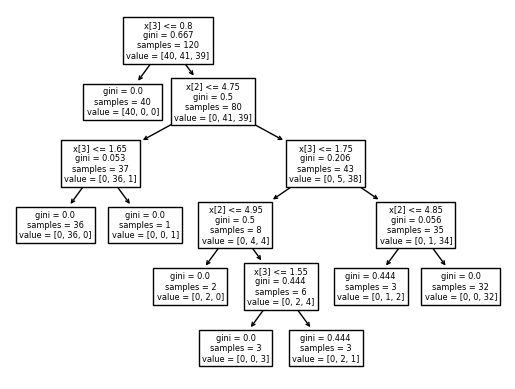

In [23]:
tree.plot_tree(clf)

In [17]:
?clf

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier(max_depth=5)
File:        d:\pythonnn\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2


In [18]:
clf.feature_importances_

array([0.        , 0.01695274, 0.39586398, 0.58718328])

In [3]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [4]:
clf.predict([[2., 2.]])

array([1])

In [5]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [6]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

[Text(0.5, 0.75, 'x[0] <= 1.0\nsquared_error = 1.0\nsamples = 2\nvalue = 1.5'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 0.5'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 2.5')]

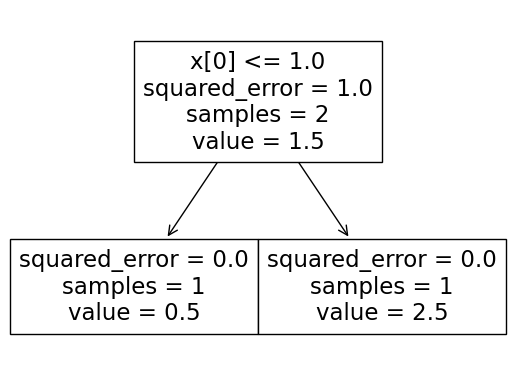

In [7]:
tree.plot_tree(clf)